# Final Project: Credit Card Fraud
author: Rachel Nelson

class: DSC530-T303 Data Exploration and Analysis (2211-1)


### Question:

What are factors that correlate to fraud? Can you use those factors to create predictions on which credit card transactions are fraudulent?

### Result Summary:

In [90]:
from __future__ import print_function, division

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import thinkplot
import pandas as pd
import thinkstats2
import statistics
import random
import hypothesis
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
data = pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#summary statistics that give count, mean, std, min, max of each factor
data.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
fraud = data[data.Class == 1]
others = data[data.Class != 1]

# Counts fraud and non fraud then divides the two and prints result
n = len(fraud)
d = len(others)
p = (n/(n+d)*100)
print("{:.2f}".format(p),'% of the transactions are fraud')

0.17 % of the transactions are fraud


Text(0, 0.5, 'Frequency')

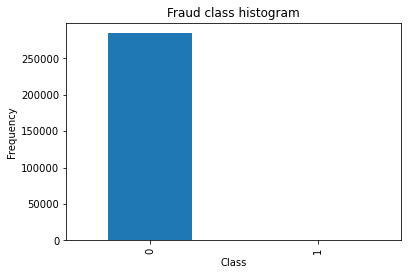

In [5]:
data_hist = pd.value_counts(data['Class'], sort = True).sort_index()
data_hist.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

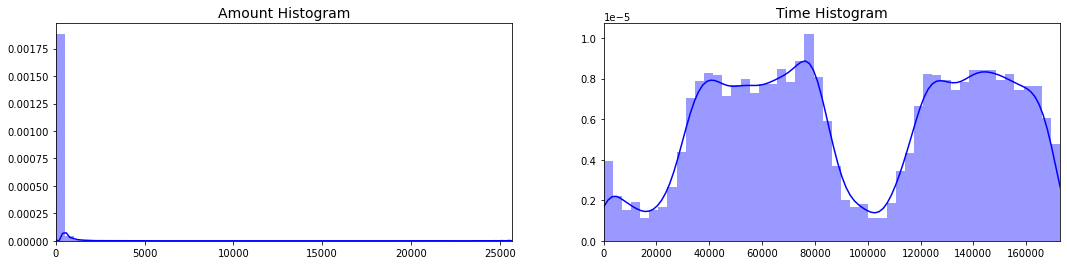

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values
v9_val = data['V9'].values
V4_val = data['V4'].values

sns.distplot(amount_val, ax=ax[0], color='b')
ax[0].set_title('Amount Histogram', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Time Histogram', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

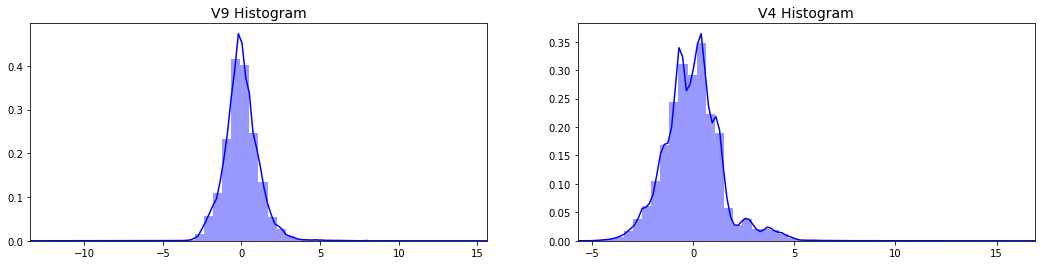

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
v9_val = data['V9'].values
V4_val = data['V4'].values

sns.distplot(v9_val, ax=ax[0], color='b')
ax[0].set_title('V9 Histogram', fontsize=14)
ax[0].set_xlim([min(v9_val), max(v9_val)])

sns.distplot(V4_val, ax=ax[1], color='b')
ax[1].set_title('V4 Histogram', fontsize=14)
ax[1].set_xlim([min(V4_val), max(V4_val)])

plt.show()

In [8]:
print("Class Statistics")
print('The Mean is:', "{:.2f}".format(data.Class.mean()))
print('The Variance is:', "{:.2f}".format(data.Class.var()))
print('The Skew is:', data.Class.skew())
print(stats.mode(data.Class))

print("\n")
print("Amount Statistics")
print('The Mean is:', "{:.2f}".format(data.Amount.mean()))
print('The Variance is:', "{:.2f}".format(data.Amount.var()))
print('The Skew is:', data.Amount.skew())
print(stats.mode(data.Amount))

print("\n")
print("Time Statistics")
print('The Mean is:', "{:.2f}".format(data.Time.mean()))
print('The Variance is:', "{:.2f}".format(data.Time.var()))
print('The Skew is:', data.Time.skew())
print(stats.mode(data.Time))

print("\n")
print("V4 Statistics")
print('The Mean is:', "{:.2f}".format(data.V4.mean()))
print('The Variance is:', "{:.2f}".format(data.V4.var()))
print('The Skew is:', data.V4.skew())
print(stats.mode(data.V4))

print("\n")
print("V9 Statistics")
print('The Mean is:', "{:.2f}".format(data.V9.mean()))
print('The Variance is:', "{:.2f}".format(data.V9.var()))
print('The Skew is:', data.V9.skew())
print(stats.mode(data.V9))




Class Statistics
The Mean is: 0.00
The Variance is: 0.00
The Skew is: 23.99757931064749
ModeResult(mode=array([0], dtype=int64), count=array([284315]))


Amount Statistics
The Mean is: 88.35
The Variance is: 62560.07
The Skew is: 16.977724453761024
ModeResult(mode=array([1.]), count=array([13688]))


Time Statistics
The Mean is: 94813.86
The Variance is: 2255124006.20
The Skew is: -0.0355676180063216
ModeResult(mode=array([163152.]), count=array([36]))


V4 Statistics
The Mean is: 0.00
The Variance is: 2.00
The Skew is: 0.676292097985747
ModeResult(mode=array([-0.84231603]), count=array([77]))


V9 Statistics
The Mean is: -0.00
The Variance is: 1.21
The Skew is: 0.5546797719063509
ModeResult(mode=array([0.17036185]), count=array([77]))


In [9]:
random.seed(30)
# Get random sample of 492 records from non-fraud
others_s = others.sample(492)
others_s.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,...,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.0
mean,100136.178862,0.000016,0.003066,-0.043789,-0.061659,-0.059144,0.030535,0.025949,-0.082176,-0.058792,...,0.088283,0.031756,0.012365,0.043017,0.002906,0.033701,0.026351,-0.005193,97.658435,0.0
std,47311.069178,1.896473,1.563147,1.610939,1.446124,1.549041,1.486352,1.333454,1.446996,1.151335,...,0.982300,0.799364,0.395504,0.593429,0.516131,0.484883,0.343939,0.307494,261.566158,0.0
min,22.000000,-13.433588,-11.620969,-11.175752,-3.896010,-18.654302,-6.405774,-6.552874,-12.968538,-3.095799,...,-6.169994,-5.404703,-1.876560,-1.959024,-1.528180,-1.155696,-2.072561,-3.675632,0.000000,0.0
25%,60498.250000,-0.911348,-0.589971,-0.852077,-0.966134,-0.763495,-0.744981,-0.500219,-0.213329,-0.780305,...,-0.200233,-0.504476,-0.166179,-0.323843,-0.343896,-0.289073,-0.065042,-0.046440,6.087500,0.0
50%,109893.000000,-0.008540,0.016336,0.151900,-0.180030,-0.168226,-0.297818,-0.002199,0.024712,-0.089765,...,0.011129,0.067681,-0.001221,0.071014,-0.015542,-0.024821,-0.000973,0.014850,24.790000,0.0
75%,143988.500000,1.283155,0.791529,1.011761,0.709505,0.623099,0.365314,0.594426,0.311119,0.590391,...,0.215136,0.586891,0.136201,0.507967,0.369083,0.283669,0.108121,0.087009,79.992500,0.0
max,171773.000000,2.308820,7.199591,3.121086,4.755986,8.302748,13.373798,18.948236,8.820529,5.819502,...,11.049811,2.649003,2.917524,1.239877,1.604514,1.423783,3.180613,1.464364,4103.750000,0.0


In [10]:
df = [fraud, others_s]
df = pd.concat(df)

In [ ]:
data_hist = pd.value_counts(df['Class'], sort = True).sort_index()
data_hist.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

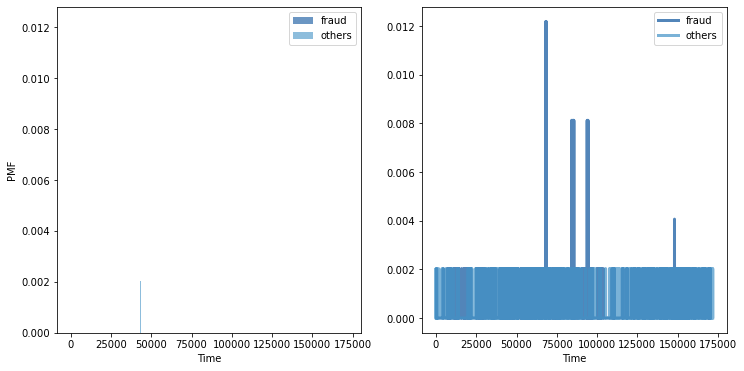

In [18]:

fraud_pmf = thinkstats2.Pmf(fraud.Time, label='fraud')
others_pmf = thinkstats2.Pmf(others_s.Time, label='others')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(fraud_pmf, align='right')
thinkplot.Hist(others_pmf, align='left')
thinkplot.Config(xlabel='Time', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([fraud_pmf, others_pmf])
thinkplot.Config(xlabel='Time')

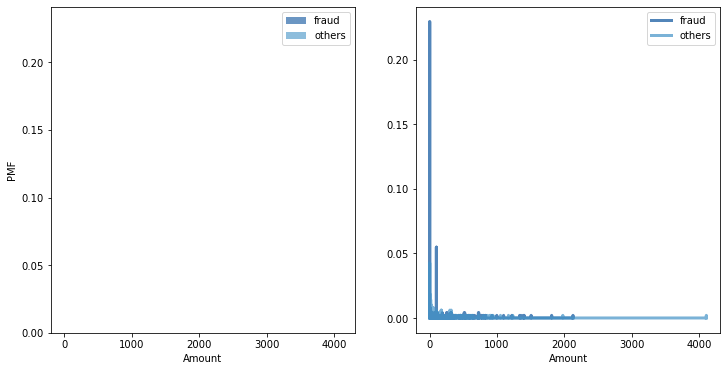

In [19]:

fraud_pmf = thinkstats2.Pmf(fraud.Amount, label='fraud')
others_pmf = thinkstats2.Pmf(others_s.Amount, label='others')

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(fraud_pmf, align='right')
thinkplot.Hist(others_pmf, align='left')
thinkplot.Config(xlabel='Amount', ylabel='PMF')

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([fraud_pmf, others_pmf])
thinkplot.Config(xlabel='Amount')

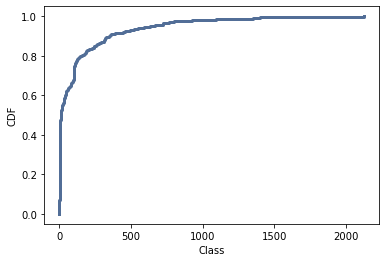

Because the CDF is not a straight line, the distribution is not uniform


<Figure size 576x432 with 0 Axes>

In [20]:

#plots the CDF of the random numbers
cdf = thinkstats2.Cdf(fraud.Amount)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Class', ylabel='CDF')
thinkplot.show()

print("Because the CDF is not a straight line, the distribution is not uniform")

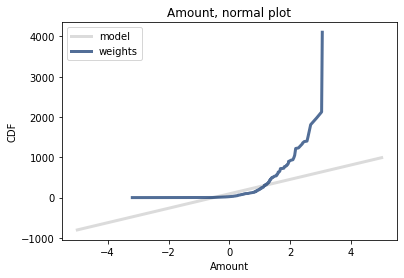

In [41]:
Amount = df.Amount.dropna()
def MakeNormalPlot(Amount):
    mean, var = thinkstats2.TrimmedMeanVar(df.Amount, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(Amount)
    thinkplot.Plot(xs, ys, label='weights')

MakeNormalPlot(Amount)
thinkplot.Config(title='Amount, normal plot', xlabel='Amount',
                 ylabel='CDF', loc='upper left')

<ipython-input-40-b8a932518af7>:3: RuntimeWarning: divide by zero encountered in log10
  cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')


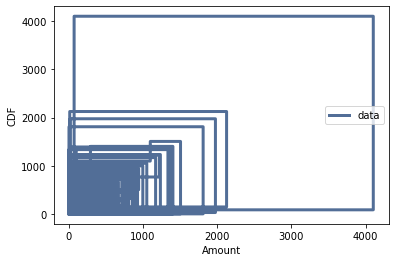

In [40]:
xs, ps = df.Amount.values, df.Amount.values
cdf = thinkstats2.Cdf(xs, ps, label='data')
cdf_log = thinkstats2.Cdf(np.log10(xs), ps, label='data')

# linear plot
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Amount',
                   ylabel='CDF')


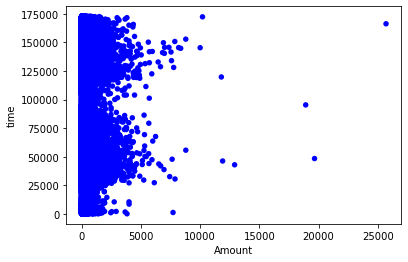

<Figure size 576x432 with 0 Axes>

In [46]:
thinkplot.Scatter(data.Amount, data.Time, alpha=1)
thinkplot.Config(xlabel='Amount',
                 ylabel='time')
thinkplot.show()

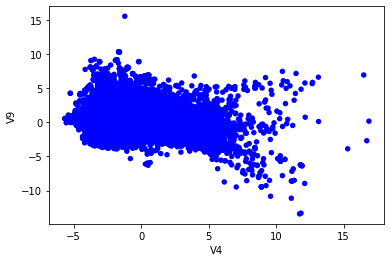

<Figure size 576x432 with 0 Axes>

In [47]:
thinkplot.Scatter(data.V4, data.V9, alpha=1)
thinkplot.Config(xlabel='V4',
                 ylabel='V9')
thinkplot.show()

In [49]:
df1 = df[['Time', 'Amount', 'Class', 'V4', 'V9']]

In [51]:
rs = np.random.RandomState(0)
df = pd.DataFrame(df1)
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,Time,Amount,Class,V4,V9
Time,1.000000,-0.008751,-0.199873,-0.252702,0.168868
Amount,-0.008751,1.000000,0.047369,-0.009900,0.005552
Class,-0.199873,0.047369,1.000000,0.711668,-0.544088
V4,-0.252702,-0.009900,0.711668,1.000000,-0.779914
V9,0.168868,0.005552,-0.544088,-0.779914,1.000000


In [67]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

data = fraud.V9.values, others_s.V9.values
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
print(pvalue)


0.0


In [96]:
estimators=['Time', 'V4',  'V9','Amount']
est = df[estimators]
cls = df['Class']
X = sm.add_constant(est)
logit = sm.Logit(cls,X)
summ_logit = logit.fit()
summ_logit.summary()

Optimization terminated successfully.
         Current function value: 0.308156
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  984
Model:                          Logit   Df Residuals:                      979
Method:                           MLE   Df Model:                            4
Date:                Fri, 20 Nov 2020   Pseudo R-squ.:                  0.5554
Time:                        12:10:47   Log-Likelihood:                -303.23
converged:                       True   LL-Null:                       -682.06
Covariance Type:            nonrobust   LLR p-value:                1.135e-162
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6614      0.253     -6.565      0.000      -2.157      -1.165
Time       -2.625e-06   2.24e-06     -1.174      0.240   -7.01e-06    1.76e-06
V4             0.9928      0.075     13.215      0.000       0.846       1.140
V9            -0.3770      0.097     -3.872      0.000      -0.568      -0.186
Amount         0.0003      0.000      0.844      0.399      -0.000       0.001
==============================================================================
"""